#Imports

In [1]:
# DataFrame, data processing, CSV file I/O (e.g. pd.read_csv)
import os

import pandas as pd
import numpy as np

# Translation
from googletrans import Translator

# Matplot
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns


# Sklearn
from sklearn.ensemble import IsolationForest

1. Loading the data set

The dataset we are going to be using can be downloaded from Kaggle:
https://www.kaggle.com/datasets/lama122/saudi-arabia-real-estate-aqar
This is a ********************************************

##decrease datafile size using parquet
Print the dataset size - CSV mode

In [2]:
#function used to calculate size of file
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "K", "M", "G", "T", "P", "E", "Z"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0

        
    return f"{num:.1f}Yi{suffix}"

In [3]:
csv_dataset_path = 'datasets/SA_Aqar.csv'
file_stats = os.stat(csv_dataset_path)
print(f'CSV Dataset file size: {sizeof_fmt(file_stats.st_size)}')

CSV Dataset file size: 1.5MB


In [4]:
#load dataset
print("Open file:", csv_dataset_path)

dfM2 = pd.read_csv(csv_dataset_path)

#amount of data
print("Shape: ", dfM2.shape)

Open file: datasets/SA_Aqar.csv
Shape:  (3718, 24)


##Data exploration and cleaning

Here is what our data containes:

**city**: the city where the house is located in<br>
**district**: district where the house is located in<br>
**front**: What is the house front is north, west .. etc<br>
**size**: size in m^2<br>
**property_age**: property age for the house<br>
**bathrooms**: number of bathrooms<br>
**livingrooms**: number of living rooms<br>
**kitchen**: show whether the house has a kitchen or not<br>
**garage**: show whether the house has a garage or not<br>
**driver_room**: show whether the house has a driver_room or not<br>
**maid_room**: show whether the house has a maid_room or not<br>
**furnished**: show whether the house is furnished or not<br>
**ac**: show whether the house has an air conditioning or not<br>
**roof**: show whether the house has a space for a roof on top or not<br>
**pool**: show whether the house has a pool or not<br>
**frontyard**: show whether the house has a front yard or not<br>
**basement**: show whether the house has a basement or not<br>
**duplex**: show whether the house is a duplex or not<br>
**stairs**: show whether the house has stairs or not<br>
**elevator**: show whether the house has an elevator or not<br>
**fireplace**: show whether the house has a fireplace or not<br>
**price: show the price of the house**<br>
**details**: shows any additional details from the house owner about the house<br>

Lets take a sneak peek at what our data looks like, we can see the columns as explained above.

In [5]:
dfM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [6]:
dfM2.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [7]:
def get_info(_column, df):
    column_obj = eval(f'df.{_column}')
    print(f'min  of {_column} = {column_obj.min()}')
    print(f'max  of {_column} = {column_obj.max()}')
    print(f'mean of {_column} = {column_obj.mean()}')
    print(f'sdv  of {_column} = {column_obj.std()}')
    
    
def print_info(df: pd.DataFrame):
    numeric_columns = [var for var in df.select_dtypes(include=np.number) if len(df[var].value_counts()) > 2]
    for column in  numeric_columns:
        get_info(column, df)
        print()
        
#print_info(dfM2)

dfM2.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


Check for NULL values in our data

In [8]:
# Checking null values
null_count = dfM2.isnull().sum()

# Calculate the percentage of missing values
null_percentage = (null_count / len(dfM2)) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': null_count.index,
    'Count': null_count.values,
    'Percentage': null_percentage.values
})

# Print the summary
print(missing_data_summary)


          Column  Count  Percentage
0           city      0    0.000000
1       district      0    0.000000
2          front      0    0.000000
3           size      0    0.000000
4   property_age      0    0.000000
5       bedrooms      0    0.000000
6      bathrooms      0    0.000000
7    livingrooms      0    0.000000
8        kitchen      0    0.000000
9         garage      0    0.000000
10   driver_room      0    0.000000
11     maid_room      0    0.000000
12     furnished      0    0.000000
13            ac      0    0.000000
14          roof      0    0.000000
15          pool      0    0.000000
16     frontyard      0    0.000000
17      basement      0    0.000000
18        duplex      0    0.000000
19        stairs      0    0.000000
20      elevator      0    0.000000
21     fireplace      0    0.000000
22         price      0    0.000000
23       details     80    2.151694


We can see that the only column with missing values ​​is **details** (~2%)

In [9]:
# Print the binary columns values with percentages
binary_columns = [var for var in dfM2.select_dtypes(include=np.number) if len(dfM2[var].value_counts()) == 2]

for column_name in binary_columns:
    print(f"\n{column_name}")
    
    # Map 0 to "False" and 1 to "True"
    #dfM2[column_name] = dfM2[column_name].map({0: "False (0)", 1: "True (1)"})
    
    # Calculate value counts and percentages
    value_counts = dfM2[column_name].value_counts()
    total_count = len(dfM2[column_name])
    percentages = (value_counts / total_count) * 100
    
    # Print count and percentage for each value
    for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
        print(f"{value}: Count={count}, Percentage={percentage:.2f}%")



kitchen
1: Count=3381, Percentage=90.94%
0: Count=337, Percentage=9.06%

garage
1: Count=2982, Percentage=80.20%
0: Count=736, Percentage=19.80%

driver_room
0: Count=1875, Percentage=50.43%
1: Count=1843, Percentage=49.57%

maid_room
1: Count=2957, Percentage=79.53%
0: Count=761, Percentage=20.47%

furnished
0: Count=3259, Percentage=87.65%
1: Count=459, Percentage=12.35%

ac
1: Count=2085, Percentage=56.08%
0: Count=1633, Percentage=43.92%

roof
1: Count=1939, Percentage=52.15%
0: Count=1779, Percentage=47.85%

pool
0: Count=3114, Percentage=83.75%
1: Count=604, Percentage=16.25%

frontyard
1: Count=2984, Percentage=80.26%
0: Count=734, Percentage=19.74%

basement
0: Count=3591, Percentage=96.58%
1: Count=127, Percentage=3.42%

duplex
0: Count=1861, Percentage=50.05%
1: Count=1857, Percentage=49.95%

stairs
1: Count=3028, Percentage=81.44%
0: Count=690, Percentage=18.56%

elevator
0: Count=3417, Percentage=91.90%
1: Count=301, Percentage=8.10%

fireplace
0: Count=3044, Percentage=81

In order to organize our data we want to

   1. erase irrelevent attributes
   2. erase or fill in missing values

However, prior to proceeding, and to facilitate comprehension, we will engage in translation tasks

In [10]:
to_replace = {"شمال": "north", "جنوب": "south", "غرب": "west","شرق":"east", "شمال شرقي":"northeast","جنوب شرقي":"south east"
             ,"3 شوارع":"street", "جنوب غربي":"southwest","شمال غربي":"northwest","4 شوارع":"street",  }

dfM2.replace(to_replace=to_replace, inplace=True)


def translate_arabic_to_english(text):
    translator = Translator()
    translation = translator.translate(text, dest='en')  
    return translation.text
    
#dfM2['city'] = dfM2['city'].apply(translate_arabic_to_english)
dfM2.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,north,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,south,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,south,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,west,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,west,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


# Data visualization

A brief explanation of **Skewness** and **Kurtosis** 

**
Skewne** ess measures the asymmetry of a dataset's distributon.

    Positive Skewness (Right-skewed): Majority of data on the left, tail on the right. Ideal range: +0.5 to+2.0.

    Negative Skewness (Left-skewed): Majority of data on the right, tail on the left. Ideal range: -2.0 t
** -0.5.
** 

Kurtosis measures the tails of a distribution in relation o its peak.

    Leptokurtic (High Kurtosis): Heavy tails and a sharp peak. Indicates outliers. Ideal range:+1.5 to +3.0.

    Mesokurtic (Normal Kurtosis): Tails and peak similar to a normal distribution. Ideal rang: -1.5 to +1.5.

    Platykurtic (Low Kurtosis): Light tails and a flat peak. Fewer outliers. Ideal ra

These measures help us select appropriate statistical methods and models and detect outliers.nge: -3.0 to -1.5.

Skewness: 7.690328
Kurtosis: 118.677936


<Figure size 500x1000 with 0 Axes>

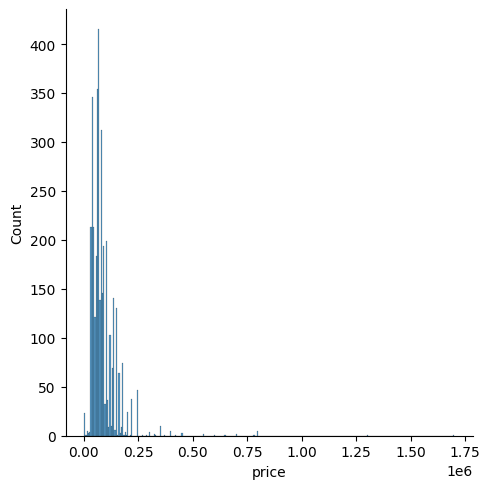

In [11]:
plt.figure(figsize=(5, 10))

sns.displot(dfM2['price'])

# Skewness and kurtosis
print("\033[1mSkewness:\033[0m %f" % dfM2['price'].skew())
print("\033[1mKurtosis:\033[0m %f" % dfM2['price'].kurt())

# Show the plot
plt.show()

Skewness: 59.479436
Kurtosis: 3595.511080


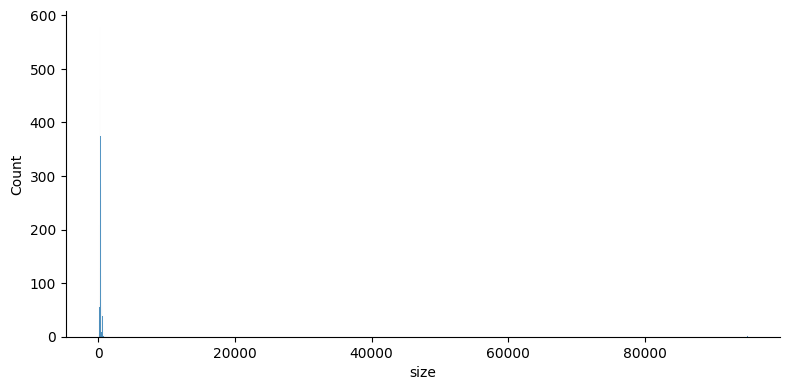

In [12]:
sns.displot(dfM2['size'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['size'].skew())
print("Kurtosis: %f" % dfM2['size'].kurt())

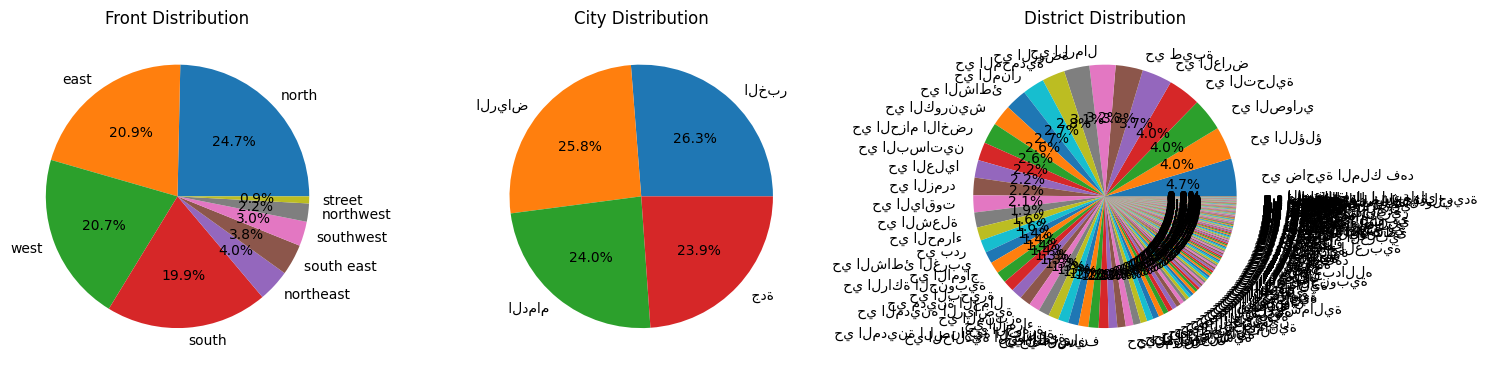

In [13]:
columns_to_plot = ['front', 'city', 'district']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    category_counts = dfM2[column].value_counts(normalize=True)
    axes[i].pie(category_counts, autopct='%1.1f%%', labels=category_counts.index)
    axes[i].set_ylabel('')
    axes[i].set_title(f'{column.capitalize()} Distribution')

plt.tight_layout()
plt.show()

In [14]:
num_districts = dfM2['district'].nunique()
print(f"Note the district has {num_districts} different values")


Note the district has 174 different values


Skewness: 2.011501
Kurtosis: 3.870958


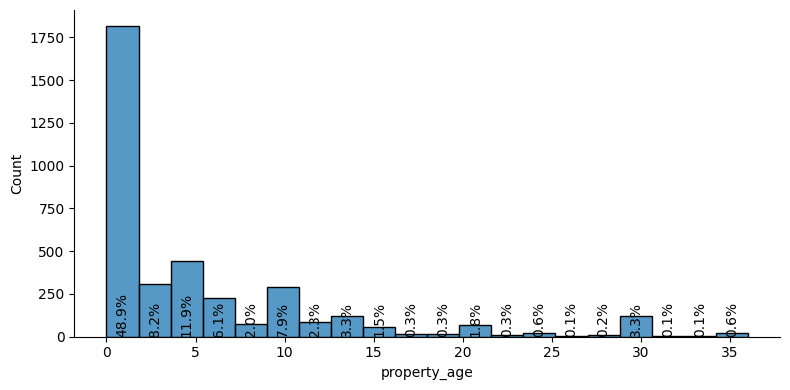

In [15]:
sns.displot(dfM2['property_age'], height=4, aspect=2, kde=False, bins=20)

# Skewness and kurtosis
skewness = dfM2['property_age'].skew()
kurtosis = dfM2['property_age'].kurt()
print("\033[1mSkewness:\033[0m %f" % skewness)
print("\033[1mKurtosis:\033[0m %f" % kurtosis)

# Add percentage labels to each bin
counts, bin_edges, _ = plt.hist(dfM2['property_age'], bins=20, alpha=0)  # Get bin counts and edges
for i, bin_edge in enumerate(bin_edges[:-1]):
    count = counts[i]
    percentage = count / len(dfM2['property_age']) * 100
    plt.annotate(f'{percentage:.1f}%', xy=(bin_edge + (bin_edges[i + 1] - bin_edge) / 2, 0),
                 ha='center', va='bottom', rotation=90)

plt.show()

Skewness: 2.011501
Kurtosis: 3.870958


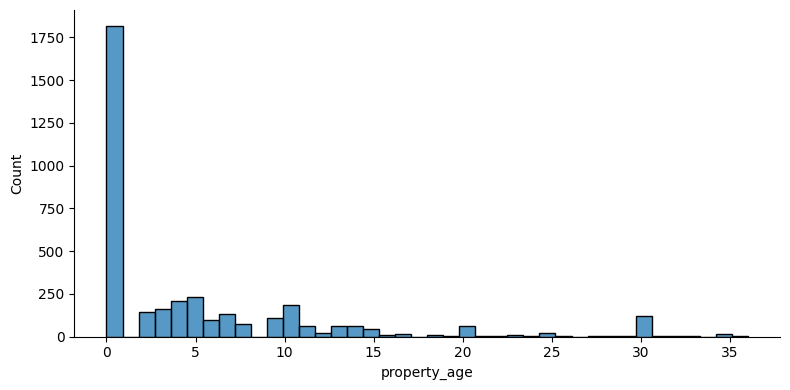

In [16]:
sns.displot(dfM2['property_age'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['property_age'].skew())
print("Kurtosis: %f" % dfM2['property_age'].kurt())

C:\Users\עתידה\AppData\Local\Temp\ipykernel_6552\861788771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfM2, x=column, ax=ax, palette='viridis')
C:\Users\עתידה\AppData\Local\Temp\ipykernel_6552\861788771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfM2, x=column, ax=ax, palette='viridis')
C:\Users\עתידה\AppData\Local\Temp\ipykernel_6552\861788771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfM2, x=column, ax=ax, palette='viridis')
C:\Users\עתידה\AppData\Local\Temp\ipykernel_6552\861788771.py:14

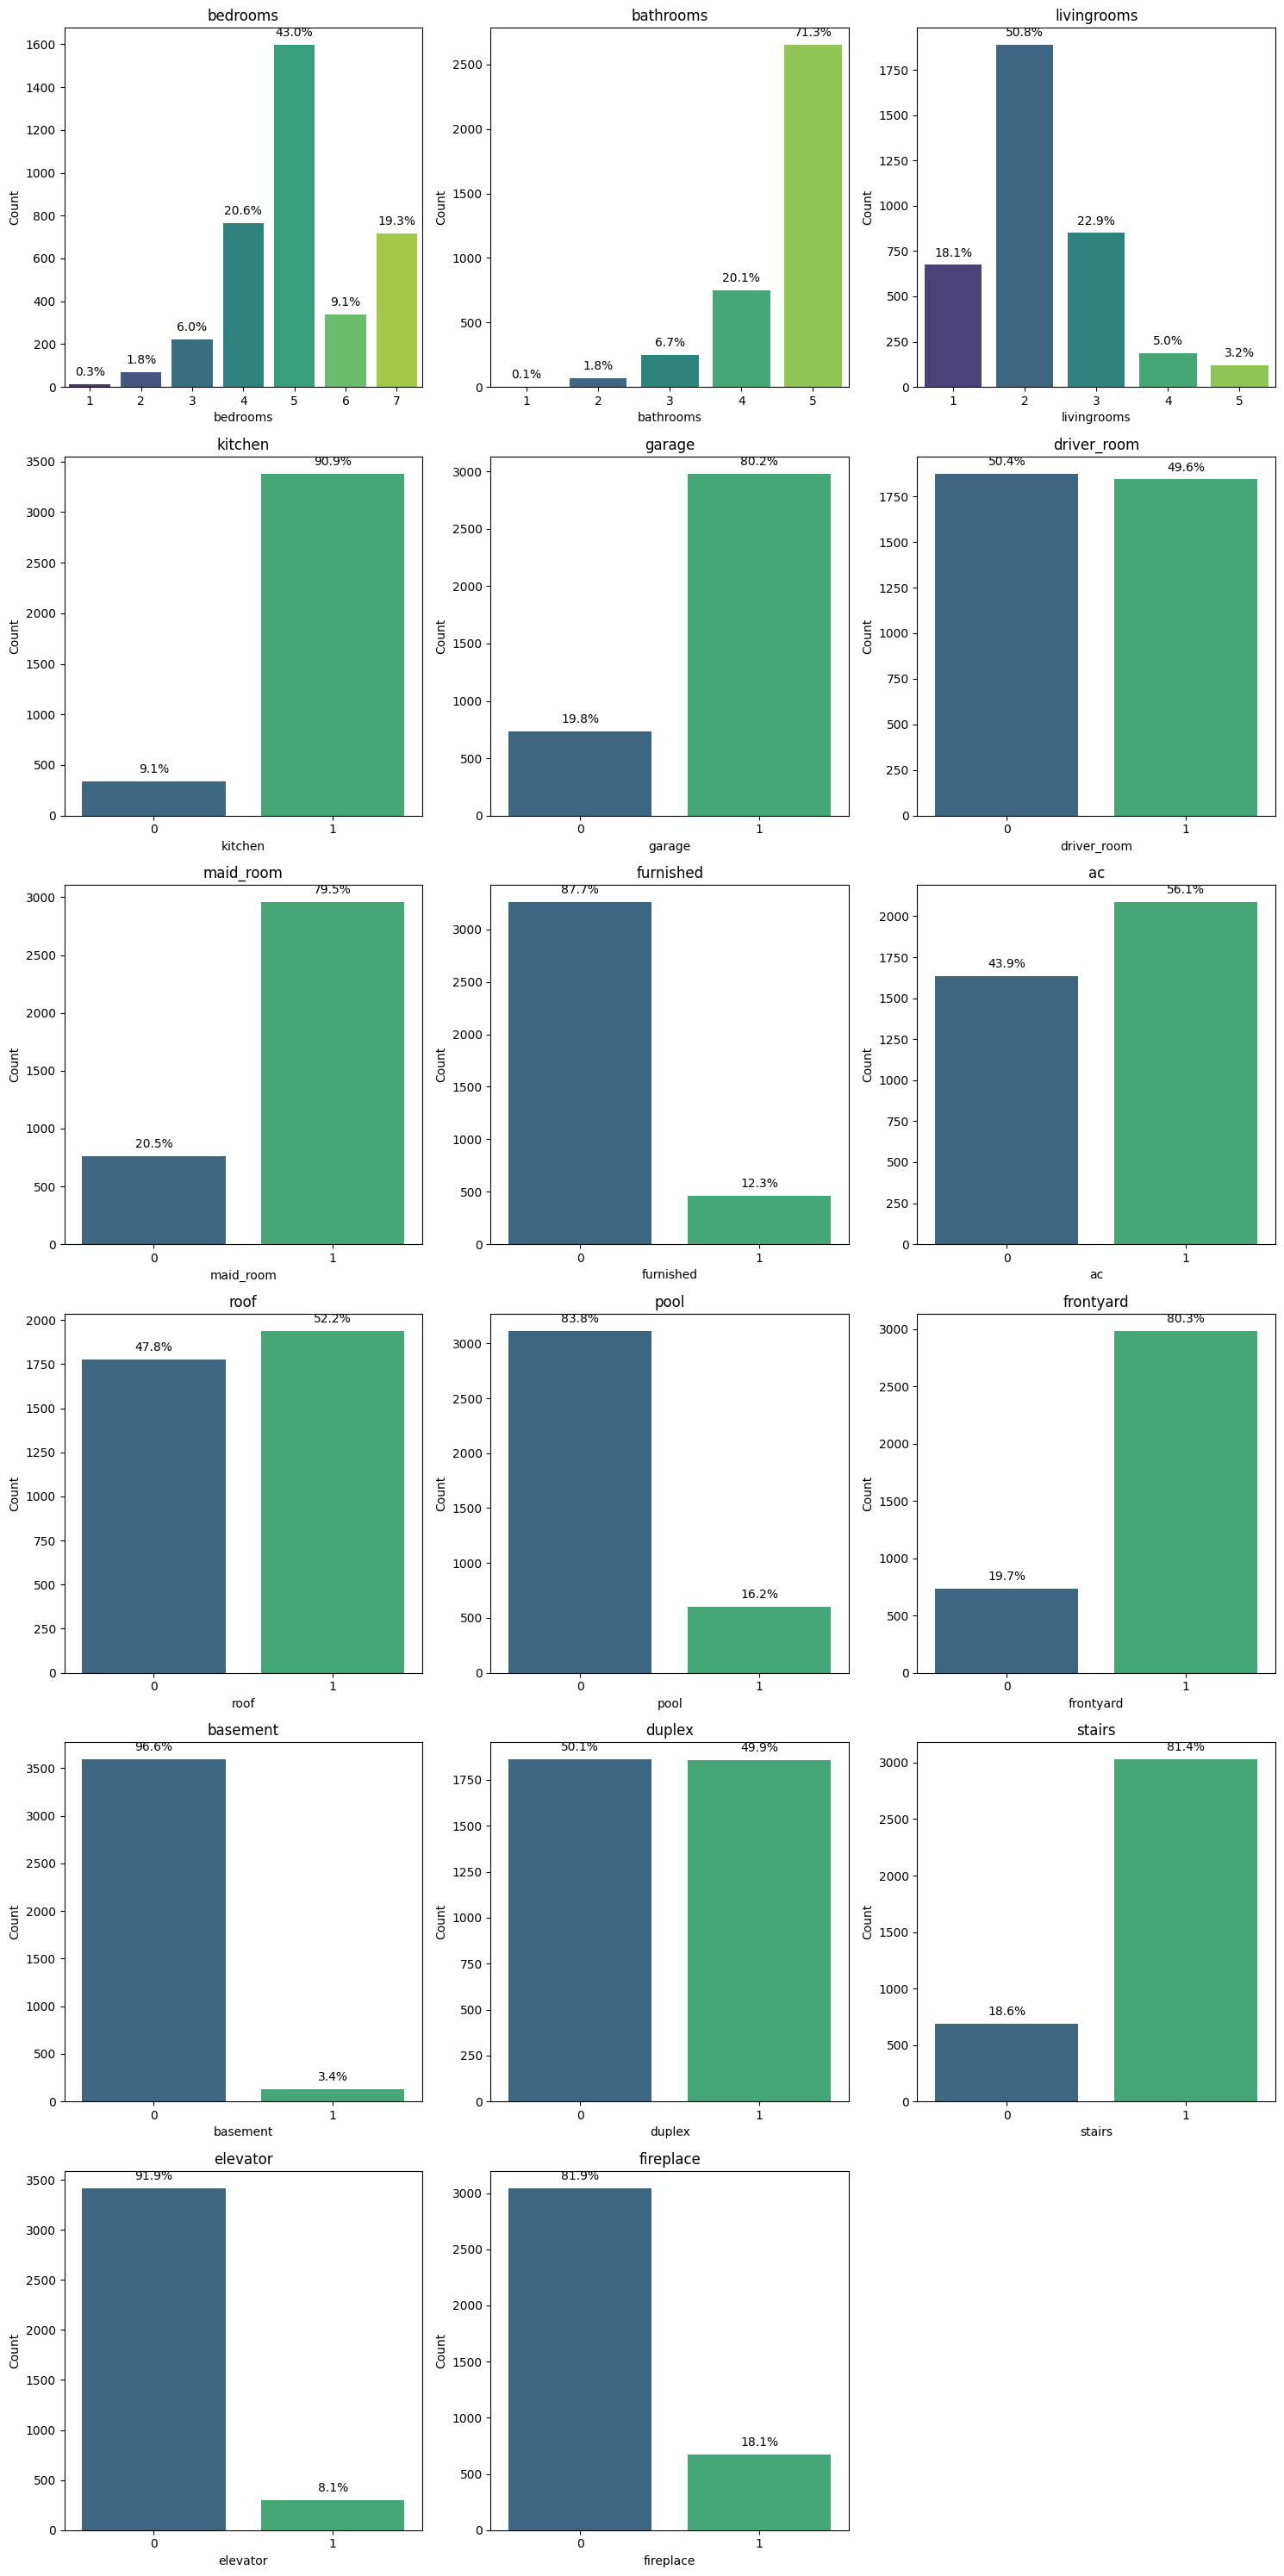

In [17]:
columns_to_plot = [col for col in dfM2.select_dtypes(include='number') if dfM2[col].nunique() < 10]

num_plots = len(columns_to_plot)
num_cols = min(num_plots, 3) 
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for idx, column in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    sns.countplot(data=dfM2, x=column, ax=ax, palette='viridis')

    total_count = len(dfM2[column])
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

for i in range(num_plots, num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes[i // num_cols, i % num_cols])
    else:
        fig.delaxes(axes[i])

plt.tight_layout() 
plt.show()

## Drop columns

Since the wanted destination is Amsterdam, we can ignore the 4 cities mapped in our data and the district, in addition we have no possibility to get information from the "details" column (due to too many words in Arabs we cannot use googletrans module), so we will delete that as well

In [18]:
dfM2.drop(columns=['details','district','city'], axis=1 ,inplace=True)

## Correlation

We will now assess the correlation between various features and our target variable - price. To facilitate this analysis, we will convert categorical text representations into corresponding numeric categories.

In [19]:
to_replace = {"north":1, "south":2,"west":3,"east":4,"northeast":5,"south east":6 , "southwest":7,"northwest":8,"street":9}
dfM2.replace(to_replace=to_replace, inplace=True)

<Axes: >

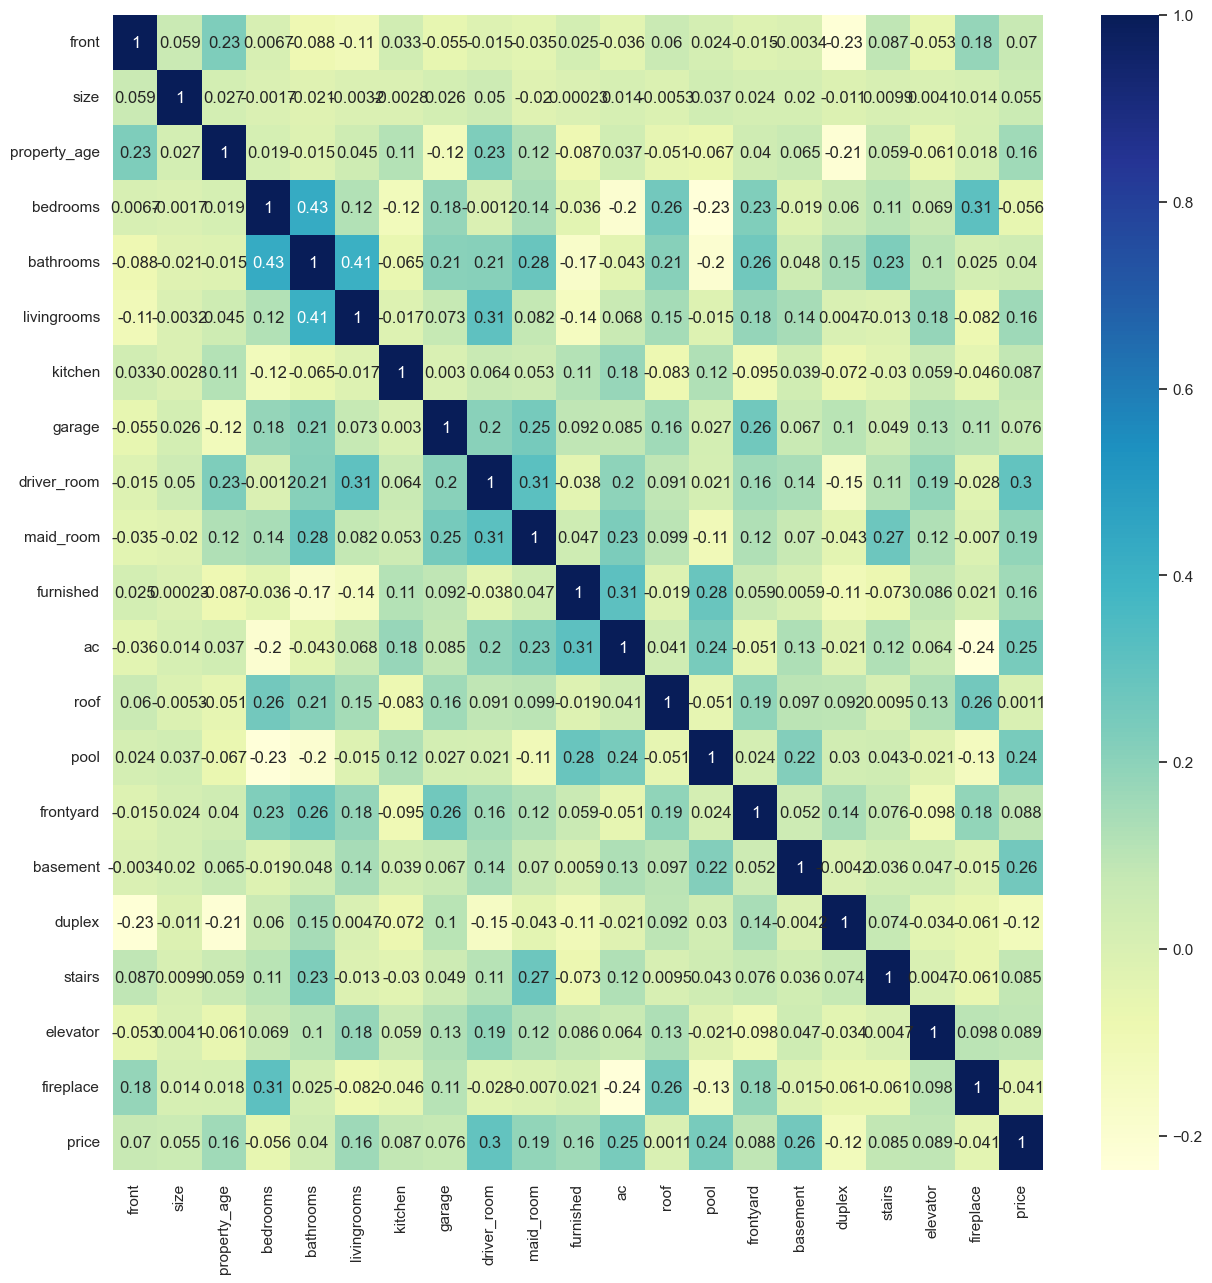

In [20]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(dfM2.corr(numeric_only=True), cmap='YlGnBu', annot=True)

# 3. EDA - Exploratory Data Analysis

## Outliers

## Price
We display the outliers values visually

Percentage of outliers: 19.23%


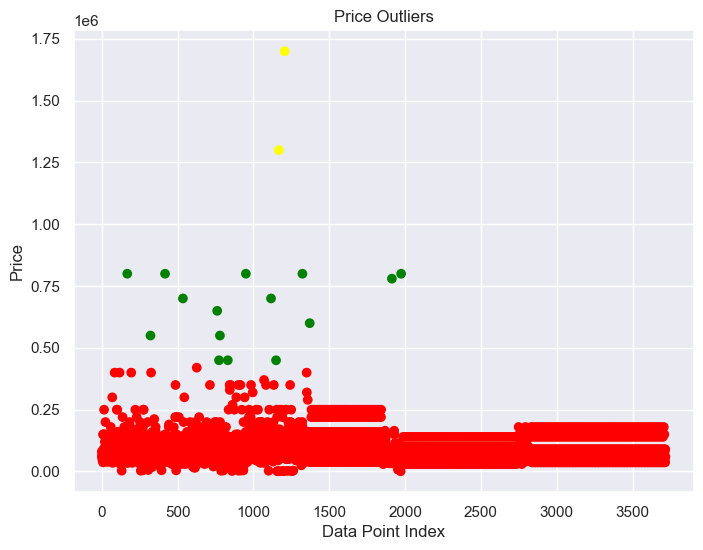

In [21]:
# Isolation Forest for outlier detection
X = dfM2[['price']]
iso_forest = IsolationForest(contamination=0.2)
outliers = iso_forest.fit_predict(X)

outlier_percentage = (sum(outliers == -1) / len(outliers)) * 100
print(f"\033[1mPercentage of outliers: {outlier_percentage:.2f}%\033[0m")

dfM2['color_category'] = pd.cut(dfM2['price'], bins=4, labels=['red', 'green', 'blue', 'yellow'])

plt.figure(figsize=(8, 6))
plt.scatter(x=range(len(dfM2['price'])), y=dfM2['price'], c=dfM2['color_category'])
plt.title("Price Outliers")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.show()

In [22]:
highest_values = dfM2['price'].nlargest(2)

# Print the count of the two highest values
print(f"Count of the two highest values: {highest_values.count()}")

Count of the two highest values: 2


We observe that the two highest values in the 'price' column exhibit a considerable magnitude compared to other outliers. As a precautionary measure to prevent potential distortions in the subsequent modeling process, we have decided to exclude these extreme values from the dataset.

In [23]:
percentile_95 = np.percentile(dfM2['price'], 95)

top_values = dfM2['price'].nlargest(2)

# Drop rows containing the two highest values
dfM2 = dfM2.drop(dfM2[dfM2['price'].isin(top_values)].index)

Now we will perform **Winsorizing**, by replacing values beyond the 95th percentile with the value at the 95th percentile. 

In [24]:
# Replace values beyond the 95th percentile with the value at the 95th percentile
dfM2.loc[dfM2['price'] > percentile_95, 'price'] = percentile_95

Display the price again

Skewness: 0.912250
Kurtosis: 0.009712


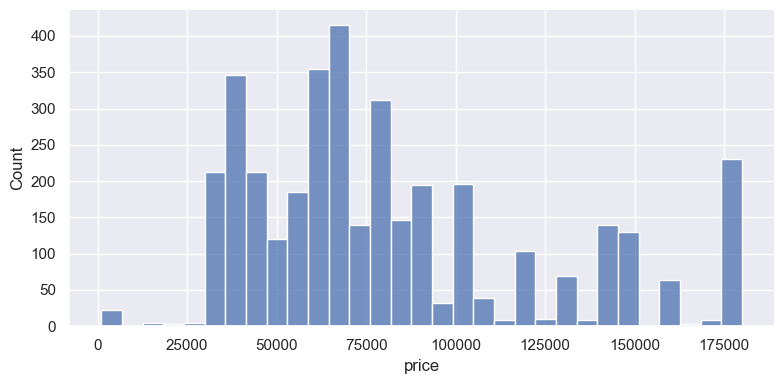

In [25]:
sns.displot(dfM2['price'],  height=4, aspect=2);
print("\033[1mSkewness:\033[0m %f" % dfM2['price'].skew())
print("\033[1mKurtosis:\033[0m %f" % dfM2['price'].kurt())

  A skewness of 0.912250 suggests a right-skewed distribution (hight prices), which may deviate from normality.
    A kurtosis of 0.009712 is close to 0, indicating approximately normal tails.

## Size

In [27]:
min_size = dfM2['size'].min()
max_size = dfM2['size'].max()

print(f"The range of 'size' is very large ({min_size} - {max_size})")


The range of 'size' is very large (1 - 95000)


In addition  the Skewness(59.479436) and Kurtosis(3595.511080) values are extremely high.